## Import Statements

In [445]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator
import matplotlib.patches as mpatches
from astroquery.vizier import Vizier
import re

## Giants

In [390]:
giants = Vizier(columns=["B-V", "SpType"], catalog=["J/A+AS/127/251"])
giants.ROW_LIMIT = -1
giant = giants.get_catalogs("J/A+AS/127/251")[0]
print(giant)

giant_SpType = giant['SpType']


pattern = re.compile(r'([OBAFGKM][0-9\.]*)[-:]?([Ia-bV]+)?')
full_abs_mag_lookup = {
    'F0V': 2.6, 'F2V': 2.8, 'F5V': 3.5, 'G0V': 4.4, 'G2V': 4.8, 'G5V': 5.1, 'K0V': 5.9,
    'A0III': 0.8, 'A5III': 1.1,
    'F0III': 1.3, 'F2III': 1.5, 'F4III': 1.7, 'F5III': 1.9, 'F6III': 2.0,
    'G0III': 0.8, 'G2III': 0.8, 'G5III': 0.9, 'G7III': 1.0, 'G8III': 1.1, 'G9III': 1.3,
    'K0III': 1.5, 'K1III': 1.6, 'K2III': 1.7, 'K3III': 1.8, 'K4III': 1.8, 'K5III': 1.9,
    'M3III': -0.4, 'M4III': -0.5, 'M5III': -0.6,
    'F2IV': 1.0, 'F5IV': 1.3, 'G2IV': 2.5,
    'G2II': -2.2, 'G8II': -2.2, 'K1II': -2.0,
    'K0Ib': -4.2, 'K3Ib': -4.5,
    'F2III-IV': 1.5, 'F4II-III': -1.0, 'G8II-III': -1.2, 'F0III-IV': 1.2,
    'G8-K0III': 1.3, 'F7Ib-II': -4.5,
}


def get_approx_abs_mag(full_type):
    match = pattern.search(full_type)
    if not match:
        return np.nan

    spectral_class_base = match.group(1)[0]
    luminosity_class = match.group(2)
    
    if spectral_class_base in abs_mag_of_type and luminosity_class in lum_class_offset:
        base_mag = abs_mag_of_type[spectral_class_base]
        offset = lum_class_offset[luminosity_class]
        return base_mag + offset
    else:
        return np.nan

giant['abs_mag_est'] = pd.Series(giant_SpType).apply(get_approx_abs_mag)

giant_df = giant.to_pandas()
print(len(giant_df))
giant_df = giant_df.dropna(subset=['abs_mag_est'])

giant = giant_df
giant_b_v = giant['B-V']
giant_temp = 4600/(0.92*giant_b_v + 1.77) 
giant_abs_v_mag = giant['abs_mag_est']

 B-V     SpType  
 mag             
----- -----------
 0.34    F2III-IV
 0.92    G8II-III
 1.22     K1.5III
 0.42       F5III
 1.00       G5III
 0.37       F2III
 1.28       K3III
 1.02 G9.5IIICH-1
 0.33    F1III-IV
 0.97        G8II
 1.12       K1IIe
 0.90       G8III
  ...         ...
 0.91    G8III-IV
 0.80       G2III
 1.02       K1III
 0.40       F1III
 0.84       K0III
 0.61       F8III
 1.01    G8III-IV
 1.03    K1III-IV
 1.58     M7IIIpe
 0.20    A7III-IV
 0.44    F5III-IV
 0.79       G1III
 0.93       G9III
Length = 450 rows
450
1209.5078125


## More Giants

In [389]:
### giants2 = Vizier(columns=["Vmag","Bmag","Gal"], catalog=["J/ApJ/836/64"])
giants2.ROW_LIMIT = -1
giant2 = giants2.get_catalogs("J/ApJ/836/64")

giant2_v_mag = giant2["J/ApJ/836/64/table4"]["Vmag"]
giant2_b_mag = giant2["J/ApJ/836/64/table4"]["Bmag"]
giant2_gal = giant2["J/ApJ/836/64/table4"]["Gal"]

giant2b_v = giant2_b_mag - giant2_v_mag

gal_dist = {
    "M31" : 778000,
    "M33" : 835000 }

giant2_d = pd.Series(giant2_gal).map(gal_dist)

giant2_dist = giant2_d.to_numpy()

giant2_abs_v_mag = giant2_v_mag - (5*np.log10(giant2_dist/10)) + 5

#bib code for equation 1996ApJ...469..355F
giant2_temp = 4600/(0.928*giant2b_v + 1.77)     
                                   
print(giant2["J/ApJ/836/64/table4"])

giant2_temp = np.array(giant2_temp)
giant2_abs_v_mag = np.array(giant2_abs_v_mag)


#Making Some More Data Based On Internnet Research to Add a coupel hypergiants in order: Rho Cassiopeiae, VY Canis Majoris, AG Carinae, Eta Carinae, P Cygni
# S Doradus, Cygnus OB2-12, Omicron1 Centaur,i HD 168607, Zeta1 Scorpii


hyper_abs_v_mag = np.array([-9.5,-9.4, -8, -8.6, -7.9, -10.0, -9.82, -9.0, -8.4, -8.5])
hyper_temp = np.array([6000,3490, 15000, 37200, 18700, 8500, 13700, 5700, 9300, 18000])

 Vmag  Bmag Gal
 mag   mag     
----- ----- ---
18.18 18.46 M31
18.20 18.35 M31
19.51 19.54 M31
17.36 17.31 M31
17.76 18.20 M31
17.33 17.36 M31
18.62 18.77 M31
16.99 17.21 M31
17.69 18.02 M31
18.09 18.00 M31
18.81 19.21 M31
17.36 17.67 M31
  ...   ... ...
17.26 17.33 M33
17.26 17.33 M33
18.13 17.89 M33
18.00 18.09 M33
16.49 16.68 M33
18.46 18.56 M33
20.57 22.36 M33
17.88 17.80 M33
18.67 18.64 M33
16.64 16.66 M33
17.39 17.74 M33
17.66 17.52 M33
18.25 18.11 M33
Length = 144 rows


## Main Sequence Stars (Plus some Dwarfs and a Lot of Red Giants)

In [258]:
url='https://drive.google.com/file/d/1b1fukPSqnSjT6hJ9pI4TSAzEWrtL-8Bv/view?usp=sharing'
df = pd.read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url.split('/')[-2]))
df = df.dropna(subset=['Dist', 'Gmag', 'Teff'])
df = df.drop(['RA_ICRS','DE_ICRS','Source','Plx','PM','pmRA','pmDE','e_Gmag','BPmag','e_BPmag','RPmag','e_RPmag','GRVSmag','e_GRVSmag','BP-G','G-RP','pscol','Mass-Flame','Age-Flame','z-Flame','SpType-ELS'],axis=1)

df.head()

,Unnamed: 0,Gmag,BP-RP,Teff,Dist,Rad,Lum-Flame
0,0,10.966603,0.132317,9406.7,918.2012,2.3686,33.161472
1,1,10.369156,0.236492,9348.7,679.7121,2.4642,25.817343
2,2,10.038978,0.477917,7520.7,339.8108,1.9321,10.527038
3,3,9.810181,0.537237,7052.3,433.9715,2.9735,20.801886
4,4,8.163041,0.126472,9982.8,251.2483,2.2829,45.868046


In [393]:
largeDataArray = np.array(df)

mainsq_temp = largeDataArray[:,3]
mainsqbp_rp = largeDataArray[:,2]  
mainsq_gmag = largeDataArray[:,1]  
mainsq_dist = largeDataArray[:,4]

mainsq_v_mag = mainsq_gmag + 0.0176+0.00686*(mainsqbp_rp)+0.1732*(mainsqbp_rp)**2

mainsq_abs_v_mag = mainsq_v_mag - (5*np.log10(mainsq_dist))+5

3039.2


## White Dwarf Stars

In [261]:
url2='https://drive.google.com/file/d/1dcYMWjShiVA4_ncSnTdiIX3KoUUPHeWN/view?usp=sharingg'
df2 = pd.read_csv('https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(url2.split('/')[-2]))
df2 = df2.drop(['#RA',	'DEC',	'Source_ID','parallax',	'pmra','pmdec',	'logg_VOSA','Lbol',	'Logg',	'e_Logg',	'R',	'e_R',	'M',	'e_M',	'Simbad_Name',	'Simbad_Main_Type',	'Simbad_Other_Type',	'Simbad_SpType'],axis=1)
df2 = df2.dropna()
df2.head()

,distance,G_mag,Gbp_mag,Grp_mag,Teff
0,77.374709,16.892885,16.891329,16.793390,9500.0
1,159.846178,18.850864,18.818426,18.747452,10000.0
2,156.051836,19.316450,19.324858,19.173970,8250.0
3,239.851654,19.017124,18.960796,18.961979,10000.0
4,68.951512,18.300790,18.477520,17.841183,6000.0


In [367]:
wD_array = np.array(df2)

wDTemp = wD_array[:,4]
wD_g_mag = wD_array[:,1]
wD_dist = wD_array[:,0]
wDbp_rp = wD_array[:,2] - wD_array[:,3]

wD_v_mag = wD_g_mag + 0.0176+0.00686*(wDbp_rp)+0.1732*(wDbp_rp)**2

wD_abs_v_mag = wD_v_mag - (5*np.log10(wD_dist))+5

66893
66893


## Getting into Categories

In [460]:
abs_mag = np.concatenate((mainsq_abs_v_mag, wD_abs_v_mag,hyper_abs_v_mag,giant2_abs_v_mag,giant_abs_v_mag), axis=0) 
temp = np.concatenate((mainsq_temp, wDTemp,hyper_temp,giant2_temp,giant_temp),axis=0)
    
conditions = [
    (abs_mag < -7.5),
    (abs_mag < -5) & (abs_mag >= -7.5),
    (abs_mag > (52 - 10.5 * np.log10(temp))) & ( temp > 3000),
    (abs_mag >= 10),
    (abs_mag > (25 - 6.5 * np.log10(temp))) & (abs_mag < (52 - 10.5 * np.log10(temp))),
    (abs_mag < 10)
]

categories = [ 5, 4, 1, 0, 2, 3]

starCategories = np.select(conditions, categories, default=np.nan)

## Graphing

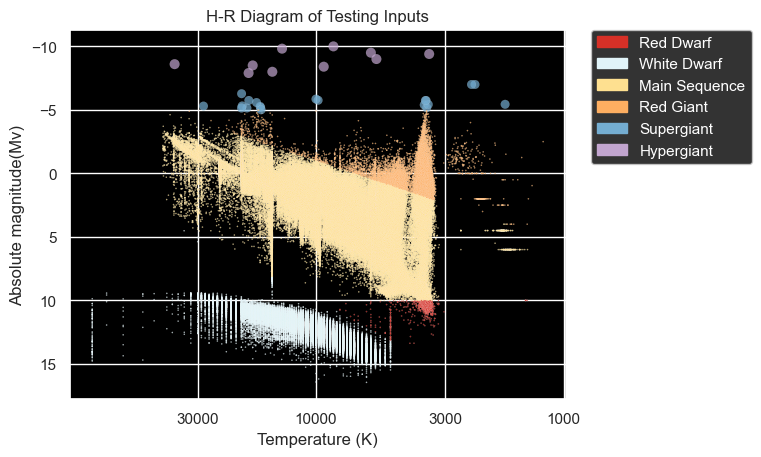

In [474]:
label_map = {
        0 : 'Red Dwarf',
        1 : 'White Dwarf',
        2 : 'Main Sequence',
        3 : 'Red Giant',
        4 : 'Supergiant',
        5 : 'Hypergiant'
    }

size_map = {
    0: 1,
    1: 1,  
    2: 1,   
    3: 1, 
    4: 40,   
    5: 50, 
}

starColorPallet = {
    0 : '#d73027',  
    1: '#e0f3f8',    
    2: '#fee090', 
    3 : '#fdae61',
    4: '#74add1', 
    5: '#c2a5cf'  
}

sns.scatterplot(x=temp,y=abs_mag,size=starCategories,sizes=size_map,hue=starCategories,palette=starColorPallet,alpha=0.7,legend=False)
sns.set(rc={'axes.facecolor':'black'})
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xscale('log')
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.title('H-R Diagram of Testing Inputs')
patches = [mpatches.Patch(color=starColorPallet[i], label=label_map[i]) for i in np.flip(label_map.keys())]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, markerscale=2.5, labelcolor = "white")
plt.xticks([30000, 10000,3000, 1000], ['30000', '10000','3000', '1000'])
plt.savefig('TestingInputs.png',bbox_inches='tight')
plt.show()

## Total Number of Each

In [461]:
unique_categories, counts = np.unique(starCategories, return_counts=True)
print("Category Totals:")
for category, count in zip(unique_categories, counts):
    print(f"Category {category}: {count} stars")
print("Total number of stars: " + str(len(abs_mag)))

Category Totals:
Category 0.0: 7630 stars
Category 1.0: 66886 stars
Category 2.0: 582197 stars
Category 3.0: 22363 stars
Category 4.0: 20 stars
Category 5.0: 10 stars
Total number of stars: 679106


## Saving the Data to a Numpy Array

In [454]:
trainingData = np.vstack((abs_mag,temp,starCategories))
np.save('trainingData.npy', trainingData)